In [5]:
#!/usr/bin/python

'''
File name : OpenRetina_manipulations.ipynb
Authors : Pierre Albiges, Victor Boutin and Laurent Perrinet
Date created : 2017-04-25
Date last modified : 2017-04-27
Object : Apprehend the OpenRetina project through the manipulation of the Photoreceptor class

See https://github.com/laurentperrinet/openRetina/blob/master/src/openRetina.py
'''

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division, print_function
import array
import time
import numpy as np
from multiprocessing.pool import ThreadPool
from collections import deque
from distutils.version import LooseVersion

np.set_printoptions(precision=2, suppress=True)

class PhotoReceptor :
    
    def __init__(self, w, h, cam_id=0, DOWNSCALE=-1, verbose = True) :
        self.sleep_time = 2 #Letting the camera warming up for 2 seconds
        self.fps = 90 #MaxLimit
        self.led = False
        self.h, self.w = h, w
        
        ''' On Unix systems '''
        
        self.rpi = False

        import cv2

        self.cap = cv2.VideoCapture(cam_id)
        if verbose: print ("Before. dim1 : {0}, dim2 : {1}".format(self.h,self.w))

        if LooseVersion(cv2.__version__).version[0] == 2:

            self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, self.w)
            self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, self.h) 

            self.DOWNSCALE = DOWNSCALE
            if DOWNSCALE > 1 :
                W = self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
                H = self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT)
                self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, W/self.DOWNSCALE)
                self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, H/self.DOWNSCALE)
            self.h, self.w = self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT), self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
            if verbose: print ('Using OpenCV')
        
        else:     

            self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, self.w)
            self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, self.h)

            self.DOWNSCALE = DOWNSCALE
            if DOWNSCALE > 1:
                W = self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
                H = self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
                self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, W//self.DOWNSCALE)
                self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, H//self.DOWNSCALE)
            self.h, self.w = self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT), self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
            if verbose: print('Using OpenCV3')

        if verbose: print ("After. dim1 : {0}, dim2 : {1}".format(self.h,self.w))


    def grab(self) :
        import cv2
        ret, frame_bgr = self.cap.read() #What does ret means? Is it not used?
        #frame = frame_bgr[:, :, ::-1] #BGR to RBG.
        frame = frame_bgr
        return frame
    
    def close(self) :
        import cv2
        self.cap.release()
        del self.cap




In [6]:
Ph = PhotoReceptor(w=1280, h=720)
frame = Ph.grab()
print ('frame.shape :',frame.shape)
Ph.close()

Before. dim1 : 720, dim2 : 1280
Using OpenCV
After. dim1 : 720.0, dim2 : 1280.0
frame.shape : (720, 1280, 3)


In [6]:
import cv2
Ph = PhotoReceptor(w=1280, h=720)
Rec = True
while(Rec):
    Ph.grab()
    frame = Ph.grab()
#    cv2.imshow('Camera frame',frame)
    if cv2.waitKey(10) :
        Ph.close()
#        cv2.destroyAllWindows()
        Rec = False
#        break

Before. dim1 : 720, dim2 : 1280
Using OpenCV
After. dim1 : 720.0, dim2 : 1280.0


In [24]:
help(Ph)

Help on instance of PhotoReceptor in module __main__:

class PhotoReceptor
 |  Methods defined here:
 |  
 |  __init__(self, w, h, cam_id=0, DOWNSCALE=-1, verbose=True)
 |  
 |  close(self)
 |  
 |  grab(self)



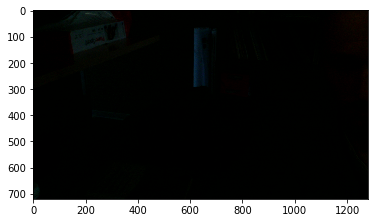

In [30]:
plt.imshow(frame)